<a href="https://colab.research.google.com/github/MohammedAimanHESSin/Image-Segmentation/blob/master/PR_Ass_2_Image_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
# clone the git hub 
# to add the dataset in the 
#VR files
!git clone https://github.com/osamasherif22/Image-Segmentation

fatal: destination path 'Image-Segmentation' already exists and is not an empty directory.


In [120]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from google.colab.patches import cv2_imshow
from scipy import io
import scipy
import imageio

# KMEANS

In [121]:
import math; #For pow and sqrt
import sys;
from random import shuffle, uniform;
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import itertools
import random


def FindNearshCentroid(means,item):
    
    minimum = sys.maxsize
    index = -1;

    for i in range(len(means)):
        #Ecludean distance
        dis = np.linalg.norm(item-means[i])

        if(dis < minimum):
            minimum = dis;
            index = i;
    
    return index;


def UpdateCentroids(clusters_data, items, centroids):

    for i in range( len(clusters_data) ):
        new_centroid_sum_x = 0
        new_centroid_sum_y = 0
        for j in range( len(clusters_data[i]) ):
            index = clusters_data[i][j]
            new_centroid_sum_x += items[index][0]
            new_centroid_sum_y += items[index][1]
        #centroids[i][0] = new_centroid_sum_x/float(j+1)
        #centroids[i][1] = new_centroid_sum_y/float(j+1)
        centroids[i][0] = new_centroid_sum_x/float(len(centroids))
        centroids[i][1] = new_centroid_sum_y/float(len(centroids))
    return centroids



def groupToCentroid(centroids,items):
    clusters_size = [0 for i in range(len(centroids))]
    clusters_data = [[] for i in range(len(centroids))]; #Init clusters
    for i in range(len(items)):
        item = items[i];           
        centroid_index = FindNearshCentroid(centroids,item);
        clusters_size[centroid_index] += 1;
        clusters_data[centroid_index].append(i)
    return clusters_data, clusters_size

def initializeCentroids(k,items):
    # print("ok")
    # centroids = []
    # while(len(centroids)!=k):
    #     cent = items[random.sample(range(0, len(items)), k)]
    #     if(len(centroids)>=1):
    #         if(cent not in centroids):
    #             centroids.append(cent)
    #         else:
    #             centroids.append(cent)
    # print("Initial centroids are {}".format(centroids))
    # return cent





     centroids = [[0 for i in range(len(items[0]))] for j in range(k)] #Init centroids array
     centroids = np.array(centroids)
     #randomIndexes = random.sample(range(0, len(items)), k)
     centroids = random.sample(list(items), k)

     # for i in range(len(randomIndexes)):
     #   #print(centroids.shape)
     #   #print(items.shape)
     #   centroids[i] = items[randomIndexes[i]]
     return centroids

def KMeans(k,items):

    iterations = 0
    converge_counter = 0
    # initialize centroids
    centroids = [[] for i in range(k)]
    centroids = np.array(centroids)
    centroids = initializeCentroids(k,items)
    print("CENTROIDS",centroids)
    old_centroids = [[] for i in range(len(centroids))]; 
    old_centroids = np.array(old_centroids)
    while np.array_equal(old_centroids, centroids) != True :
      
      converge_counter = converge_counter + 1
      clusters_data , clusters_size = groupToCentroid(centroids, items)
      old_centroids = np.copy(centroids)
      centroids = UpdateCentroids(clusters_data, items, centroids) 
      #print("old centroids  = ", old_centroids)
      #print("new centroids  = ", centroids)


      colors = itertools.cycle(["r", "b", "g", "c" , "m" , "y"])
      fig = plt.figure(figsize=(10, 10))
      for i in range(len(clusters_data)):

        item_index_array = clusters_data[i]
        point_color = next(colors)
        #for j in item_index_array:
          
          #plt.scatter(items[j][0], items[j][1], color = point_color)
          
      plt.show()

      print("CLUSTERS ---------------------------------",clusters_data)
      return clusters_data

# Load the data set and Display func

In [122]:
def get_sorted_list_filenm(path,ext):
  # Get list of all files in a given directory sorted by name
  sorted_list_of_files = sorted( filter( os.path.isfile,
                          glob(path + ext) ) )
  return sorted_list_of_files

In [123]:
# Read all the jpg image in directory
def load_image(image_path):
    arr_imgs=[]
    original_imgs = []
    files_name_sorted=get_sorted_list_filenm(image_path,"/*jpg")
    for file in files_name_sorted:
        pic = cv2.imread(file).astype(np.float32)
        pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
        shape = pic.shape
        original_imgs.append(pic)
        arr_imgs.append(np.float32(pic.reshape(-1, pic.shape[-1])))
    arr_imgs = np.array(arr_imgs) # Convert to np array
    display_img(arr_imgs[0],original_imgs[0])
    return arr_imgs,original_imgs

In [124]:
# display Ground truth imge
def display_GT (image):
  # Output img with window name as 'image'
  cv2_imshow(image)  
  # Maintain output window utill
  # user presses a key
  cv2.waitKey(0)

# display imges 
def display_img (image,origin_img):
  # Output img with window name as 'image'
  cv2_imshow(image.reshape(origin_img.shape))  
  # Maintain output window utill
  # user presses a key
  cv2.waitKey(0)      

In [125]:
# Read Ground truth files
root = '/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/'

def load_ground(root,groundtest_arr,groundtrain_arr,groundval_arr):
  PATH = os.path.join(root,'data/groundTruth')
  for sub_dir_name in ['train/','test/','val/']:
      temp_arr=[]
      sub_pth = os.path.join(PATH,sub_dir_name)
      ##Create a new folder for the generated pictures to save
      save_pth = os.path.join(root,'data/GT_convert',sub_dir_name)
      os.makedirs(save_pth,exist_ok=True)
      print('Start conversion: '+sub_dir_name)
      sorted_sub_pth=get_sorted_list_filenm(sub_pth,"/*mat")
      for filename in sorted_sub_pth:
          # Read all data in the mat file
          #mat file contains data stored in dictionary form
          #Include dict_keys(['__globals__','groundTruth','__header__','__version__'])
          #If you want to use the contour in'groundTruth']
          #x['groundTruth'][0][0][0][0][1] is the outline
          #x['groundTruth'][0][0][0][0][0] is the segmentation map
          data = io.loadmat(os.path.join(sub_pth,filename))
          edge_data = data['groundTruth'][0][0][0][0][1]
          #Store the normalized data: 0<x<1
          #So need to restore back to 0<x<255
          edge_data_255 = edge_data * 255
          temp_arr.append(edge_data_255)
          new_img_name = filename.split('.')[0]+'.jpg'
          #print(new_img_name)
          #imageio.imwrite(os.path.join(save_pth,new_img_name), edge_data_255)  # save Picture
      if (sub_dir_name=='train/' ):
        groundtrain_arr= temp_arr.copy()
        print("#################\nstored in train \n############")
      elif (sub_dir_name=='test/' ):
        groundtest_arr= temp_arr.copy()
        print("#################\nstored in test \n############")
      else:
        groundval_arr= temp_arr.copy()
        print("#################\nstored in val  \n############")

  return (groundtest_arr,groundtrain_arr,groundval_arr)



# MAIN CALLS

**read the data set**

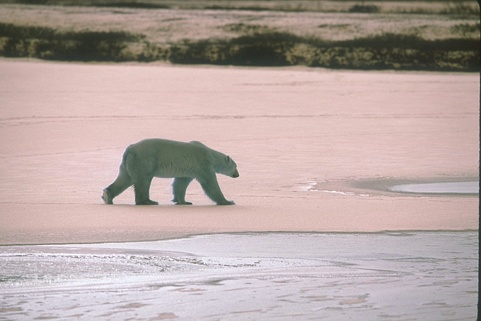

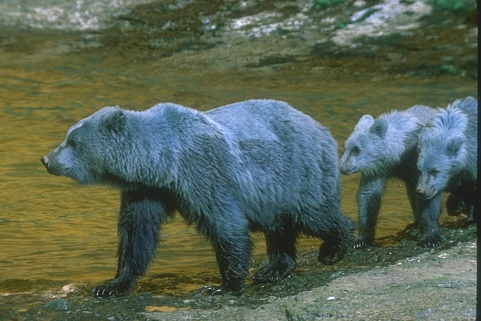

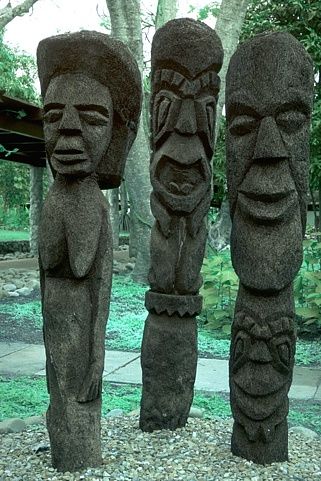

In [126]:
base='/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/images/'

#load test data set
test_imgs,test_imgs_origin=load_image(base+'test/')

#load train data set
train_imgs,train_imgs_origin=load_image(base+'train/')


#load val data set
val_imgs,val_imgs_origin=load_image(base+'val/')

In [127]:
#load Ground truth data
groundtest_arr=[]
groundtrain_arr=[]
groundval_arr=[]
groundtest_arr,groundtrain_arr,groundval_arr=load_ground(root,groundtest_arr,groundtrain_arr,groundval_arr)

Start conversion: train/
#################
stored in train 
############
Start conversion: test/
#################
stored in test 
############
Start conversion: val/
#################
stored in val  
############


**Q2. Visualize the image and the ground truth segmentation**

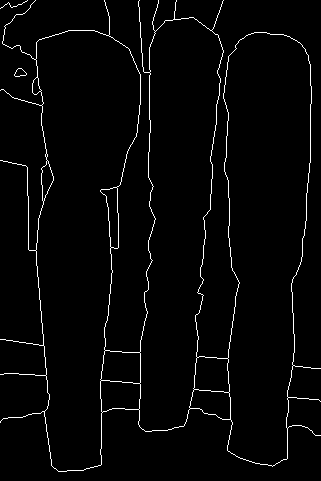

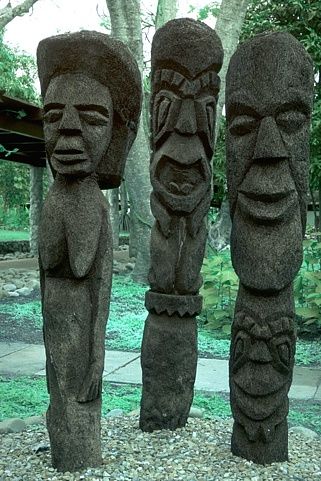

In [128]:
display_GT(np.array(groundval_arr[0]))

display_img(val_imgs[0],val_imgs_origin[0])

**Display mat file**

In [129]:
np.set_printoptions(threshold=100)
#np.set_printoptions(threshold=sys.maxsize)
root ='/content/Image-Segmentation/Dataset/BSR_bsds500/BSR/BSDS500/data/groundTruth/'
file_name='val/101085.mat'
# read a file 
x=io.loadmat(root+file_name)

print("\nground truth\n",x['groundTruth'][0][0][0][0][1])

print("\n Segmentation\n",x['groundTruth'][0][0][0][0][0])

print(x.keys())


ground truth
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 Segmentation
 [[ 1  1  1 ...  8  8  8]
 [ 1  1  1 ...  8  8  8]
 [ 1  1  1 ...  8  8  8]
 ...
 [26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]
 [26 26 26 ... 26 26 26]]
dict_keys(['__header__', '__version__', '__globals__', 'groundTruth'])


**Built in k-means**

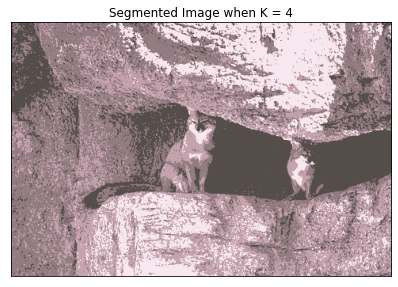

In [130]:
sample_image_builtin = train_imgs[11]

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts=10
ret,label,center=cv2.kmeans(sample_image_builtin,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape(train_imgs_origin[11].shape)
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()


**Apply our K means**

CENTROIDS [array([150., 138., 152.], dtype=float32), array([97., 84., 94.], dtype=float32), array([162., 136., 147.], dtype=float32), array([233., 216., 248.], dtype=float32), array([70., 80., 89.], dtype=float32), array([117., 111., 113.], dtype=float32), array([117., 119., 140.], dtype=float32), array([143., 128., 135.], dtype=float32), array([162., 119., 110.], dtype=float32)]


<Figure size 720x720 with 0 Axes>

CLUSTERS --------------------------------- [[244, 440, 626, 645, 939, 1867, 1885, 1903, 2349, 2365, 2383, 2845, 2846, 2847, 2864, 3041, 3327, 3345, 3722, 3790, 3825, 3842, 3862, 4322, 4582, 4604, 4787, 4801, 4803, 5233, 5284, 5729, 5764, 5766, 6197, 6243, 6244, 6246, 6725, 6904, 7176, 7177, 7178, 7205, 7374, 7385, 7651, 7655, 7658, 7685, 7687, 8132, 8135, 8152, 8154, 8155, 8156, 8614, 8615, 8624, 8625, 8633, 8634, 8635, 8636, 9093, 9094, 9096, 9097, 9098, 9114, 9115, 9117, 9573, 9575, 9576, 9609, 9610, 10047, 10055, 10056, 10057, 10058, 10088, 10089, 10090, 10538, 10565, 10568, 11019, 11290, 11500, 11501, 11502, 11526, 11970, 11980, 11992, 11993, 11994, 12008, 12451, 12473, 12474, 12475, 12476, 12489, 12490, 12943, 12954, 12955, 12969, 12970, 12974, 12975, 13425, 13433, 13434, 13435, 13436, 13437, 13448, 13450, 13451, 13453, 13466, 13643, 13893, 13894, 13914, 13916, 13917, 13918, 13919, 13929, 13930, 13931, 13934, 13935, 13937, 14130, 14374, 14375, 14397, 14398, 14399, 14411, 14414, 14

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


[[  0. 255. 127.]
 [  0. 255. 127.]
 [255.   0. 127.]
 ...
 [255.   0. 255.]
 [255.   0. 255.]
 [255.   0. 255.]]


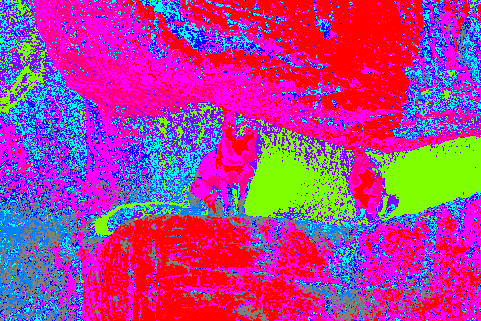

(9,)
11502
12490
35734
37243
16205
13097
5390
10277
12463


In [131]:
clusters_data = KMeans(9,train_imgs[11]) #00
clusters_data = np.array(clusters_data)
sample_image_abdo = train_imgs[11] ##
sample_image_abdo_shape = train_imgs_origin[11] ##
grey = [128 ,128, 128]
pink = [255, 0 ,127]
viola = [255, 0 ,255]
blue = [0, 0 ,255]
green = [0, 255 ,127]
yellow = [255, 255, 0]
orange = [255, 128, 0]
red = [255, 0, 0]
purple = [127, 0 ,255]
palette = [grey ,pink, viola ,blue ,green ,yellow, orange ,red ,purple]
for i in range(len(clusters_data)):
  for j in range(len(clusters_data[i])):
    index = clusters_data[i][j]
    sample_image_abdo [index] = palette[i]
print(sample_image_abdo )
cv2_imshow(sample_image_abdo.reshape(train_imgs_origin[11].shape)) 
print(clusters_data.shape)
print(len(clusters_data[0]))
print(len(clusters_data[1]))
print(len(clusters_data[2]))
print(len(clusters_data[3]))
print(len(clusters_data[4]))
print(len(clusters_data[5]))
print(len(clusters_data[6]))
print(len(clusters_data[7]))
print(len(clusters_data[8]))


# K- ways Normalized cut | K-NN graph , K=5

In [132]:
from sklearn.neighbors import kneighbors_graph
import copy
import cv2
import numpy as np

def five_image_NC(image_arr): #return five resized imgs (144, 144)
  Ncut_imgs=[]
  original_imgs = []
  for i in range (5):
    res = cv2.resize(image_arr[i+25], dsize=(144, 144), interpolation=cv2.INTER_CUBIC)
    #cv2_imshow(test_imgs_origin[i+25])
    cv2.waitKey(0)
    #cv2_imshow(res)
    cv2.waitKey(0)
    original_imgs.append(res)
    Ncut_imgs.append(np.float32(res.reshape(-1, res.shape[-1])))
  return np.array(Ncut_imgs), np.array(original_imgs)

def generate_simlarity(image):
  np.set_printoptions(threshold=20736)
  graph= kneighbors_graph(image, 5 , mode='connectivity', include_self=False)
  return graph

def clustering(graph):
  labels = spectral_clustering(graph, n_clusters=5, eigen_solver='arpack') #from 0:4
  return labels

def cloroing_img(image_in,labels):
  print("Shape" ,image_in.shape)
  for i in range(labels.shape[0]):
    if labels[i]==0 :
      image_in[i]=palette[1]
    if labels[i]==1 :
      image_in[i]=palette[1]
    if labels[i]==2 :
      image_in[i]=palette[2]
    if labels[i]==3 :
      image_in[i]=palette[3]
    if labels[i]==4 :
      image_in[i]=palette[4]
  return image_in


In [133]:
NC_imgs,NC_imgs_original=five_image_NC(val_imgs_origin) #(5, 20736, 3)
passed_img=copy.deepcopy(NC_imgs[2])
graph=generate_simlarity(passed_img)
pred_labels=clustering(graph)
colored_image=cloroing_img(passed_img,pred_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:212: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


Shape (20736, 3)


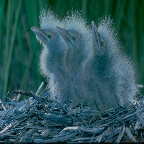

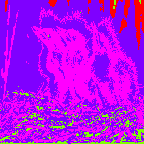

In [134]:
display_img(NC_imgs[2],NC_imgs_original[2])
display_img(colored_image,NC_imgs_original[2])